# Analyse des données de vente de Lapage

Objectifs de l'analyse :
- établir une base de données à partir des tableaux disponibles
- mettre en évidence les grandes tendances de comportement des clients
- analyser d'éventuelles corrélations entre plusieurs facteurs 

## Première étape : import des données et analyse des fichiers

A partir des trois tableaux fournis par Annabelle, on suit un procédé en trois étapes :
- on importe les fichiers
- on vérifie leur intégrité pour trouver d'éventuels problèmes à corriger
- on combine l'ensemble pour obtenir un fichier exploitable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
customers = pd.read_csv("customers.csv")
products = pd.read_csv("products.csv")
transactions = pd.read_csv("transactions.csv")

In [3]:
customers.dtypes

client_id    object
sex          object
birth         int64
dtype: object

In [4]:
customers.value_counts()

client_id  sex  birth
c_1        m    1955     1
c_6168     f    1977     1
c_6180     m    1957     1
c_618      m    1968     1
c_6179     m    1974     1
                        ..
c_3581     m    1966     1
c_3580     m    2004     1
c_358      f    1974     1
c_3579     m    1952     1
ct_1       m    2001     1
Length: 8623, dtype: int64

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [6]:
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [7]:
products.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

In [8]:
products.rename(columns={'categ':'category'},inplace=True)

In [9]:
products.value_counts()

id_prod  price   category
0_0       3.75   0           1
0_899     19.99  0           1
0_89      14.99  0           1
0_890     2.81   0           1
0_891     21.99  0           1
                            ..
0_1987    6.99   0           1
0_1988    9.86   0           1
0_1989    3.99   0           1
0_199     8.99   0           1
T_0      -1.00   0           1
Length: 3287, dtype: int64

In [10]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id_prod   3287 non-null   object 
 1   price     3287 non-null   float64
 2   category  3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [11]:
products.isnull().sum()

id_prod     0
price       0
category    0
dtype: int64

In [12]:
transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

In [13]:
transactions.value_counts()

id_prod  date                             session_id  client_id
T_0      test_2021-03-01 02:30:02.237413  s_0         ct_0         9
         test_2021-03-01 02:30:02.237446  s_0         ct_0         6
         test_2021-03-01 02:30:02.237428  s_0         ct_0         6
         test_2021-03-01 02:30:02.237414  s_0         ct_1         5
         test_2021-03-01 02:30:02.237412  s_0         ct_1         5
                                                                  ..
0_1486   2021-10-19 10:55:26.309106       s_107043    c_8574       1
         2021-10-19 19:40:46.255072       s_107217    c_8081       1
         2021-10-20 09:35:53.715307       s_107500    c_6820       1
         2021-10-21 16:10:11.944606       s_108097    c_459        1
T_0      test_2021-03-01 02:30:02.237450  s_0         ct_0         1
Length: 679406, dtype: int64

In [14]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [15]:
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

## Seconde étape : statistiques de base concernant les données

In [16]:
customers.describe()

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [17]:
products.describe()

,price,category
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [18]:
transactions.describe()

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [19]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [20]:
products.head()

,id_prod,price,category
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [21]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


Après analyse, on relève l'ensemble des détails suivants :
- les dates dans la feuille transactions sont traitées comme des objects, on peut les convertir directement en date
- certains relevés de compte dans transactions indiquent des comptes et valeurs test, indiqués respectivement sous les valeurs T_0, ct_0 et ct_1 ; n'étant pas nécessaires pour la suite de l'analyse, on se propose de les retirer des données
- les statistiques de products indiquent l'existence d'un produit ayant un prix négatif, ce qui est clairement une valeur aberrante, on peut donc le retirer des données

In [22]:
prix_negatif = products.loc[products["price"] <= 0]
prix_negatif

,id_prod,price,category
731,T_0,-1.0,0


In [23]:
comptes_test = transactions.loc[(transactions["client_id"] == "ct_0") | (transactions["client_id"] == "ct_1")]
comptes_test

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [24]:
products.drop(products[(products["id_prod"] == "T_0")].index, inplace=True)
products

,id_prod,price,category
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [25]:
transactions.drop(transactions[(transactions["id_prod"] == "T_0")].index, inplace=True)
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [26]:
transactions["date"] = pd.to_datetime(transactions["date"],yearfirst=True)
transactions.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

In [27]:
customers.drop(customers[(customers["client_id"] == "ct_0")|(customers["client_id"] == "ct_1")].index, inplace=True)
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


Pour la suite de l'analyse, il nous est demandé de prendre en compte l'âge des clients dans nos évaluations.
On propose pour cela d'ajouter une colonne âge dans les données customers, dans laquelle on calculera la différence entre l'année en cours (stockée préalablement dans une variable modifiable) et leur année de naissance.

L'année prise en compte sera celle de la dernière transaction enregistrée.

In [28]:
annee = transactions["date"].max().year
customers["age"] = annee - customers["birth"]
customers.describe()

,birth,age
count,8621.000000,8621.000000
mean,1978.275606,44.724394
std,16.917958,16.917958
min,1929.000000,19.000000
25%,1966.000000,31.000000
50%,1979.000000,44.000000
75%,1992.000000,57.000000
max,2004.000000,94.000000


## Troisième étape : mise en place de la base de données et recherche de données problématiques

In [29]:
transactions_customers = pd.merge(
    left=transactions,
    right=customers,
    left_on="client_id",
    right_on="client_id",
    how="outer",
    indicator=True
)
transactions_customers

,id_prod,date,session_id,client_id,sex,birth,age,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,37,both
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,f,1986,37,both
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,f,1986,37,both
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,f,1986,37,both
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,f,1986,37,both
...,...,...,...,...,...,...,...,...
679348,NaN,NaT,NaN,c_862,f,1956,67,right_only
679349,NaN,NaT,NaN,c_7584,f,1960,63,right_only
679350,NaN,NaT,NaN,c_90,m,2001,22,right_only
679351,NaN,NaT,NaN,c_587,m,1993,30,right_only


In [30]:
clients_sans_commandes = transactions_customers.loc[transactions_customers["_merge"] == "right_only"].shape
clients_sans_commandes

(21, 8)

In [31]:
commandes_sans_clients = transactions_customers.loc[transactions_customers["_merge"] == "left_only"].shape
commandes_sans_clients

(0, 8)

Après analyse, la base de données nous indique la présence de 21 clients ayant un compte sur la librairie en ligne, mais n'ayant jamais effectué de commande sur ce dernier. Elle nous confirme également l'absence de commandes non liées à un compte client, ce qui confirme l'intégrité des données.

In [32]:
transactions_customers = transactions_customers.loc[transactions_customers["_merge"] == "both"]
transactions_customers.drop(columns="_merge",inplace=True)

C:\Users\jeffs\AppData\Local\Temp\ipykernel_14528\240622007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_customers.drop(columns="_merge",inplace=True)


In [33]:
bdd = pd.merge(
    left=transactions_customers,
    right=products,
    left_on="id_prod",
    right_on="id_prod",
    how="outer",
    indicator=True
)
bdd

,id_prod,date,session_id,client_id,sex,birth,age,price,category,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,37.0,4.18,0.0,both
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,37.0,4.18,0.0,both
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,37.0,4.18,0.0,both
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,55.0,4.18,0.0,both
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,55.0,4.18,0.0,both
...,...,...,...,...,...,...,...,...,...,...
679348,0_1624,NaT,NaN,NaN,NaN,NaN,NaN,24.50,0.0,right_only
679349,2_86,NaT,NaN,NaN,NaN,NaN,NaN,132.36,2.0,right_only
679350,0_299,NaT,NaN,NaN,NaN,NaN,NaN,22.99,0.0,right_only
679351,0_510,NaT,NaN,NaN,NaN,NaN,NaN,23.66,0.0,right_only


In [34]:
bdd.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
sex                   object
birth                float64
age                  float64
price                float64
category             float64
_merge              category
dtype: object

In [35]:
produits_sans_commandes = bdd.loc[bdd["_merge"] == "right_only"]
print("Il y a ",produits_sans_commandes.shape[0],"produits qui n'ont jamais fait l'objet de commandes.")

Il y a  21 produits qui n'ont jamais fait l'objet de commandes.


In [36]:
produits_sans_commandes

,id_prod,date,session_id,client_id,sex,birth,age,price,category,_merge
679332,0_1016,NaT,NaN,NaN,NaN,NaN,NaN,35.06,0.0,right_only
679333,0_1780,NaT,NaN,NaN,NaN,NaN,NaN,1.67,0.0,right_only
679334,0_1062,NaT,NaN,NaN,NaN,NaN,NaN,20.08,0.0,right_only
679335,0_1119,NaT,NaN,NaN,NaN,NaN,NaN,2.99,0.0,right_only
679336,0_1014,NaT,NaN,NaN,NaN,NaN,NaN,1.15,0.0,right_only
679337,1_0,NaT,NaN,NaN,NaN,NaN,NaN,31.82,1.0,right_only
679338,0_1318,NaT,NaN,NaN,NaN,NaN,NaN,20.92,0.0,right_only
679339,0_1800,NaT,NaN,NaN,NaN,NaN,NaN,22.05,0.0,right_only
679340,0_1645,NaT,NaN,NaN,NaN,NaN,NaN,2.99,0.0,right_only
679341,0_322,NaT,NaN,NaN,NaN,NaN,NaN,2.99,0.0,right_only


In [37]:
commandes_sans_produits = bdd.loc[bdd["_merge"] == "left_only"]
print("Il y a ",commandes_sans_produits.shape[0],"commandes qui n'ont jamais fait l'objet de produits.")

Il y a  221 commandes qui n'ont jamais fait l'objet de produits.


In [38]:
commandes_sans_produits

,id_prod,date,session_id,client_id,sex,birth,age,price,category,_merge
311747,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,f,1968.0,55.0,NaN,NaN,left_only
311748,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,f,1968.0,55.0,NaN,NaN,left_only
311749,0_2245,2022-04-05 17:04:43.982913,s_189669,c_6714,f,1968.0,55.0,NaN,NaN,left_only
311750,0_2245,2022-05-05 17:04:43.982913,s_204093,c_6714,f,1968.0,55.0,NaN,NaN,left_only
311751,0_2245,2022-12-05 17:04:43.982913,s_307520,c_6714,f,1968.0,55.0,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...
311963,0_2245,2021-10-19 09:32:03.667461,s_107022,c_6128,m,1986.0,37.0,NaN,NaN,left_only
311964,0_2245,2021-11-12 09:25:22.905886,s_118458,c_7416,m,1933.0,90.0,NaN,NaN,left_only
311965,0_2245,2021-08-22 08:51:27.564509,s_79102,c_6752,m,1987.0,36.0,NaN,NaN,left_only
311966,0_2245,2022-04-22 08:51:27.564509,s_197669,c_6752,m,1987.0,36.0,NaN,NaN,left_only


On s'aperçoit à partir de ces informations qu'il existe un produit dans la base de données dont les informations de catégorie et de prix sont toutes deux manquantes. Il apparaît donc nécessaire de corriger cette erreur.

In [39]:
commandes_sans_produits["id_prod"].unique()

array(['0_2245'], dtype=object)

In [40]:
products.loc[products["category"] == 0]

,id_prod,price,category
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
4,0_1507,3.99,0
5,0_1163,9.99,0
...,...,...,...
3280,0_1314,20.63,0
3281,0_607,14.99,0
3283,0_146,17.14,0
3284,0_802,11.22,0


Le produit que nous recherchons appartient par définition à la catégorie 0. Pour déterminer son prix, on se propose une analyse interquartile des prix des produits pour déterminer s'il est pertinent d'utiliser la moyenne ou la médiane comme indicateur.

In [41]:
echantillon_prix_categorie_0 = bdd.loc[bdd["category"] == 0]
echantillon_prix_categorie_0

,id_prod,date,session_id,client_id,sex,birth,age,price,category,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,37.0,4.18,0.0,both
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,37.0,4.18,0.0,both
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,37.0,4.18,0.0,both
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,55.0,4.18,0.0,both
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,55.0,4.18,0.0,both
...,...,...,...,...,...,...,...,...,...,...
679347,0_310,NaT,NaN,NaN,NaN,NaN,NaN,1.94,0.0,right_only
679348,0_1624,NaT,NaN,NaN,NaN,NaN,NaN,24.50,0.0,right_only
679350,0_299,NaT,NaN,NaN,NaN,NaN,NaN,22.99,0.0,right_only
679351,0_510,NaT,NaN,NaN,NaN,NaN,NaN,23.66,0.0,right_only


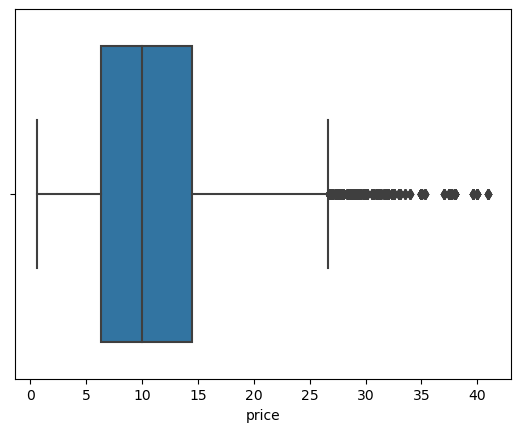

In [42]:
representation_graphique_prix = sns.boxplot(x=echantillon_prix_categorie_0["price"])

Le diagramme ci-dessus met en exergue la présence de plusieurs outliers dans la répartition des prix au sein de la librairie, ainsi qu'un écart interquartile élevé. Au regard de ces informations, on décide de prendre la valeur médiane comme prix de référence pour corriger les données manquantes dans la base de données.

In [43]:
bdd["category"] = np.where(
    bdd["id_prod"] == "0_2245",
    0,
    bdd["category"])
bdd["price"] = np.where(
    bdd["id_prod"] == "0_2245",
    bdd.loc[(bdd["category"]==0),"price"].median(),
    bdd["price"])

In [44]:
bdd.loc[bdd["id_prod"] == "0_2245"]

,id_prod,date,session_id,client_id,sex,birth,age,price,category,_merge
311747,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,f,1968.0,55.0,9.99,0.0,left_only
311748,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,f,1968.0,55.0,9.99,0.0,left_only
311749,0_2245,2022-04-05 17:04:43.982913,s_189669,c_6714,f,1968.0,55.0,9.99,0.0,left_only
311750,0_2245,2022-05-05 17:04:43.982913,s_204093,c_6714,f,1968.0,55.0,9.99,0.0,left_only
311751,0_2245,2022-12-05 17:04:43.982913,s_307520,c_6714,f,1968.0,55.0,9.99,0.0,left_only
...,...,...,...,...,...,...,...,...,...,...
311963,0_2245,2021-10-19 09:32:03.667461,s_107022,c_6128,m,1986.0,37.0,9.99,0.0,left_only
311964,0_2245,2021-11-12 09:25:22.905886,s_118458,c_7416,m,1933.0,90.0,9.99,0.0,left_only
311965,0_2245,2021-08-22 08:51:27.564509,s_79102,c_6752,m,1987.0,36.0,9.99,0.0,left_only
311966,0_2245,2022-04-22 08:51:27.564509,s_197669,c_6752,m,1987.0,36.0,9.99,0.0,left_only


In [45]:
bdd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679353 entries, 0 to 679352
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679353 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   sex         679332 non-null  object        
 5   birth       679332 non-null  float64       
 6   age         679332 non-null  float64       
 7   price       679353 non-null  float64       
 8   category    679353 non-null  float64       
 9   _merge      679353 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(4), object(4)
memory usage: 52.5+ MB


In [46]:
bdd.drop(columns="_merge",inplace=True)
bdd

,id_prod,date,session_id,client_id,sex,birth,age,price,category
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,37.0,4.18,0.0
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,37.0,4.18,0.0
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,37.0,4.18,0.0
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,55.0,4.18,0.0
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,55.0,4.18,0.0
...,...,...,...,...,...,...,...,...,...
679348,0_1624,NaT,NaN,NaN,NaN,NaN,NaN,24.50,0.0
679349,2_86,NaT,NaN,NaN,NaN,NaN,NaN,132.36,2.0
679350,0_299,NaT,NaN,NaN,NaN,NaN,NaN,22.99,0.0
679351,0_510,NaT,NaN,NaN,NaN,NaN,NaN,23.66,0.0


Pour la suite de l'analyse, on ajoute à la base de données une séparation des données en mois et années des dates afin de pouvoir décomposer les périodes aussi précisément que l'on souhaite.

In [47]:
bdd["annee"] = bdd["date"].dt.year
bdd["mois"] = bdd["date"].dt.month
bdd.sort_values(["date"],ascending=True,inplace=True)
bdd

,id_prod,date,session_id,client_id,sex,birth,age,price,category,annee,mois
191139,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967.0,56.0,11.99,0.0,2021.0,3.0
2269,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,m,1960.0,63.0,19.37,0.0,2021.0,3.0
441509,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,m,1988.0,35.0,4.50,0.0,2021.0,3.0
446670,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989.0,34.0,6.55,0.0,2021.0,3.0
67108,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956.0,67.0,16.49,0.0,2021.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
679348,0_1624,NaT,NaN,NaN,NaN,NaN,NaN,24.50,0.0,NaN,NaN
679349,2_86,NaT,NaN,NaN,NaN,NaN,NaN,132.36,2.0,NaN,NaN
679350,0_299,NaT,NaN,NaN,NaN,NaN,NaN,22.99,0.0,NaN,NaN
679351,0_510,NaT,NaN,NaN,NaN,NaN,NaN,23.66,0.0,NaN,NaN


## Quatrième étape : informations de base sur le chiffre d'affaires et les ventes

Maintenant que notre base de données est opérationnelle, on se propose d'en extraire un ensemble d'informations de base concernant les résultats de l'entreprise, à savoir :
- les produits ayant le plus contribué aux ventes, accompagné du nombre total de ventes
- le chiffre d'affaires total de la boutique, décomposé ensuite en fonction des années
- un suivi de l'évolution du chiffre d'affaires de l'entreprise au cours des différents exercices

In [48]:
nombre_ventes_produit = bdd["id_prod"].value_counts()
print(nombre_ventes_produit.head(10))
print(nombre_ventes_produit.tail(10))

1_369    2252
1_417    2189
1_414    2180
1_498    2128
1_425    2096
1_403    1960
1_412    1951
1_413    1945
1_406    1939
1_407    1935
Name: id_prod, dtype: int64
0_807     1
0_1633    1
0_549     1
0_1683    1
0_1284    1
0_1151    1
0_1539    1
0_1498    1
2_81      1
0_2308    1
Name: id_prod, dtype: int64


In [49]:
nombre_ventes_total = bdd["session_id"].count()
print("Nous avons comptabilisé un total de", nombre_ventes_total,"ventes dans la base de données.")

Nous avons comptabilisé un total de 679332 ventes dans la base de données.


In [50]:
chiffre_affaires_total = bdd.loc[bdd["client_id"] != "NaN","price"].sum()
print("La librairie en ligne a généré un chiffre d'affaires total de", chiffre_affaires_total,"euros d'après l'ensemble des données disponibles.")

La librairie en ligne a généré un chiffre d'affaires total de 11856731.75 euros d'après l'ensemble des données disponibles.


In [51]:
chiffre_affaire_annee = bdd.groupby("annee")["price"].sum()
chiffre_affaire_annee

annee
2021.0    4771695.69
2022.0    6109880.61
2023.0     974360.17
Name: price, dtype: float64

In [52]:
nombre_ventes_par_an = bdd.groupby("annee")["session_id"].count()
nombre_ventes_par_an

annee
2021.0    278335
2022.0    346500
2023.0     54497
Name: session_id, dtype: int64

In [53]:
chiffre_affaires_mois = bdd.groupby(["annee","mois"])["price"].sum()
chiffre_affaires_mois

annee   mois
2021.0  3.0     482530.52
        4.0     476249.16
        5.0     493023.39
        6.0     484158.49
        7.0     482875.36
        8.0     482374.70
        9.0     507360.56
        10.0    320868.67
        11.0    516267.63
        12.0    525987.21
2022.0  1.0     525388.94
        2.0     535681.39
        3.0     515566.42
        4.0     493138.80
        5.0     517292.44
        6.0     496086.05
        7.0     510903.00
        8.0     506547.19
        9.0     494204.44
        10.0    508017.67
        11.0    496774.83
        12.0    510279.44
2023.0  1.0     517610.48
        2.0     456749.69
Name: price, dtype: float64

Text(0.5, 1.0, "Evolution du chiffre d'affaires dans le temps")

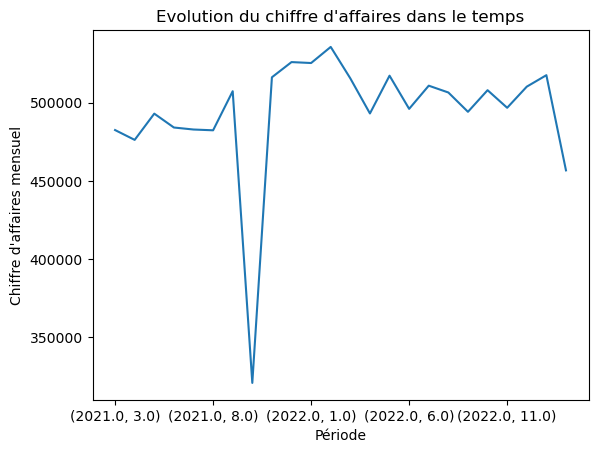

In [54]:
chiffre_affaires_mois.plot()
plt.xlabel("Période")
plt.ylabel("Chiffre d'affaires mensuel")
plt.title("Evolution du chiffre d'affaires dans le temps")

In [55]:
nombre_ventes_par_mois = bdd.groupby(["annee","mois"])["session_id"].count()
nombre_ventes_par_mois

annee   mois
2021.0  3.0     28610
        4.0     28457
        5.0     28293
        6.0     26857
        7.0     24742
        8.0     25659
        9.0     33326
        10.0    21606
        11.0    28321
        12.0    32464
2022.0  1.0     29348
        2.0     29605
        3.0     29707
        4.0     27616
        5.0     29991
        6.0     28511
        7.0     28682
        8.0     28552
        9.0     28315
        10.0    28974
        11.0    28574
        12.0    28625
2023.0  1.0     28945
        2.0     25552
Name: session_id, dtype: int64

Text(0.5, 1.0, 'Evolution du volume de ventes dans le temps')

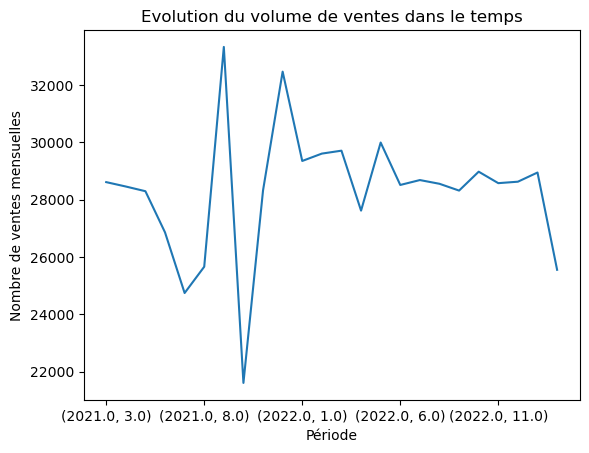

In [56]:
nombre_ventes_par_mois.plot()
plt.xlabel("Période")
plt.ylabel("Nombre de ventes mensuelles")
plt.title("Evolution du volume de ventes dans le temps")

### Analyse de la situation en octobre 2021

A partir des données disponibles, on constate une chute significative du chiffre d'affaires pour le mois d'octobre 2021, on se propose donc d'analyser les données concernées afin de comprendre la situation.

In [57]:
octobre_2021 = bdd.loc[(bdd["annee"] == 2021) & (bdd["mois"] == 10.0)]
octobre_2021

,id_prod,date,session_id,client_id,sex,birth,age,price,category,annee,mois
571943,0_1145,2021-10-01 00:00:23.722317,s_98170,c_5907,f,1991.0,32.0,6.99,0.0,2021.0,10.0
298464,1_622,2021-10-01 00:03:07.095422,s_98169,c_7614,m,1995.0,28.0,17.41,1.0,2021.0,10.0
363991,1_202,2021-10-01 00:03:16.664480,s_98171,c_4492,f,1980.0,43.0,19.96,1.0,2021.0,10.0
550780,0_2268,2021-10-01 00:06:04.960675,s_98172,c_2588,m,1989.0,34.0,17.57,0.0,2021.0,10.0
363062,0_1421,2021-10-01 00:07:50.987959,s_98173,c_5953,m,1986.0,37.0,19.99,0.0,2021.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
596045,0_1108,2021-10-31 23:42:55.889671,s_112940,c_6259,m,1991.0,32.0,17.45,0.0,2021.0,10.0
199096,1_414,2021-10-31 23:48:14.590919,s_112948,c_1609,m,1980.0,43.0,23.83,1.0,2021.0,10.0
440015,0_1425,2021-10-31 23:51:26.167675,s_112949,c_1767,f,1983.0,40.0,12.99,0.0,2021.0,10.0
638124,0_1745,2021-10-31 23:55:21.654841,s_112950,c_3320,m,1976.0,47.0,4.99,0.0,2021.0,10.0


In [58]:
octobre_2021.groupby("category").value_counts()

category  id_prod  date                        session_id  client_id  sex  birth   age   price  annee   mois
0.0       0_0      2021-10-01 14:19:38.111082  s_98446     c_8583     f    1951.0  72.0  3.75   2021.0  10.0    1
          0_1748   2021-10-17 20:09:33.634505  s_106260    c_5356     f    1973.0  50.0  16.80  2021.0  10.0    1
          0_175    2021-10-17 14:10:15.122108  s_106151    c_488      f    1985.0  38.0  15.99  2021.0  10.0    1
                   2021-10-16 03:46:54.970756  s_105428    c_4953     m    1979.0  44.0  15.99  2021.0  10.0    1
                   2021-10-06 05:54:21.782229  s_100727    c_8035     f    1979.0  44.0  15.99  2021.0  10.0    1
                                                                                                               ..
2.0       2_127    2021-10-09 11:25:42.626984  s_102242    c_2502     f    1964.0  59.0  68.99  2021.0  10.0    1
                   2021-10-07 13:46:47.679615  s_101336    c_8616     m    1984.0  39.0  68.9

Au regard de la situation, on constate l'absence de données relative à la catégorie 1, il faut par conséquent faire remonter rapidement la situation au service concerné.

## Cinquième étape : étude des moyennes mobiles

Pour compléter notre analyse des ventes, on se propose d'y ajouter une étude des moyennes mobiles du nombre de ventes, puis du chiffre d'affaires afin de mieux comprendre certaines fluctuations de ces dernières.

annee   mois
2021.0  3.0     28610.0
        4.0     28457.0
        5.0     28293.0
        6.0     26857.0
        7.0     24742.0
        8.0     25659.0
        9.0     33326.0
        10.0    21606.0
        11.0    28321.0
        12.0    32464.0
2022.0  1.0     29348.0
        2.0     29605.0
        3.0     29707.0
        4.0     27616.0
        5.0     29991.0
        6.0     28511.0
        7.0     28682.0
        8.0     28552.0
        9.0     28315.0
        10.0    28974.0
        11.0    28574.0
        12.0    28625.0
2023.0  1.0     28945.0
        2.0     25552.0
Name: session_id, dtype: float64


Text(0.5, 1.0, 'Moyenne mobile des ventes')

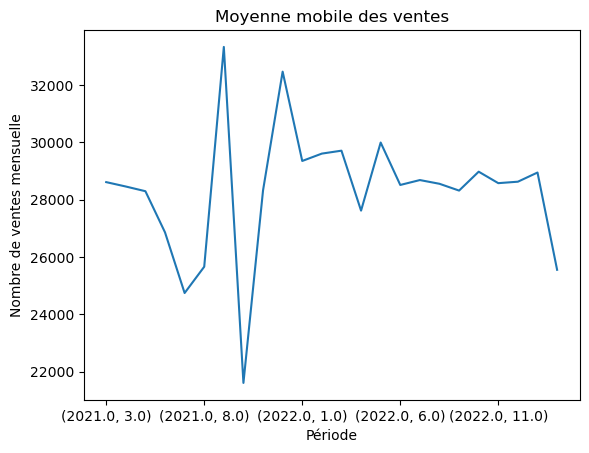

In [59]:
moyenne_mobile_ventes_mois = nombre_ventes_par_mois.rolling(1).mean()
print(moyenne_mobile_ventes_mois)
moyenne_mobile_ventes_mois.plot()
plt.xlabel("Période")
plt.ylabel("Nombre de ventes mensuelle")
plt.title("Moyenne mobile des ventes")

annee   mois
2021.0  3.0     482530.52
        4.0     476249.16
        5.0     493023.39
        6.0     484158.49
        7.0     482875.36
        8.0     482374.70
        9.0     507360.56
        10.0    320868.67
        11.0    516267.63
        12.0    525987.21
2022.0  1.0     525388.94
        2.0     535681.39
        3.0     515566.42
        4.0     493138.80
        5.0     517292.44
        6.0     496086.05
        7.0     510903.00
        8.0     506547.19
        9.0     494204.44
        10.0    508017.67
        11.0    496774.83
        12.0    510279.44
2023.0  1.0     517610.48
        2.0     456749.69
Name: price, dtype: float64


Text(0.5, 1.0, "Moyenne mobile du chiffre d'affaire")

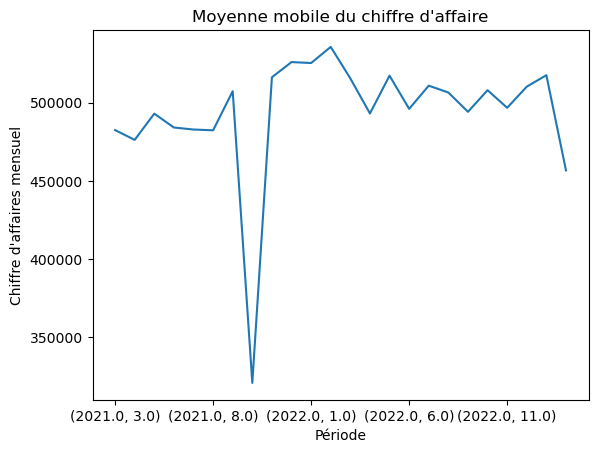

In [60]:
moyenne_mobile_chiffre_affaires_mois = chiffre_affaires_mois.rolling(1).mean()
print(moyenne_mobile_chiffre_affaires_mois)
moyenne_mobile_chiffre_affaires_mois.plot()
plt.xlabel("Période")
plt.ylabel("Chiffre d'affaires mensuel")
plt.title("Moyenne mobile du chiffre d'affaire")

## Sixième étape : analyse du chiffre d'affaires selon les catégories

In [61]:
nombre_references = products.groupby("category").count()
nombre_references

,id_prod,price
category,,
0,2308,2308
1,739,739
2,239,239


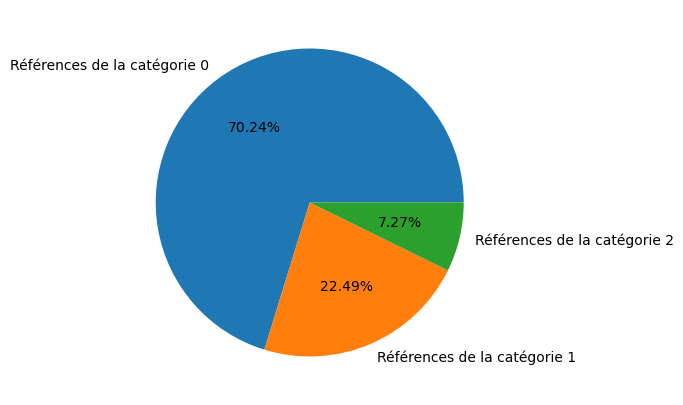

In [62]:
plt.figure(figsize = (5, 5))
x = [2308, 739,239]
plt.pie(x, labels = ["Références de la catégorie 0", "Références de la catégorie 1","Références de la catégorie 2"], normalize = True,autopct='%1.2f%%')
plt.show()

In [63]:
products.groupby("category").describe()

price                                                          \
           count        mean        std    min      25%     50%      75%   
category                                                                   
0         2308.0   11.732795   7.565755   0.62   5.5875   10.32   16.655   
1          739.0   25.531421  15.425162   2.00  13.3900   22.99   33.990   
2          239.0  108.354686  49.561431  30.99  71.0650  101.99  136.530   

                  
             max  
category          
0          40.99  
1          80.99  
2         300.00

Pour mieux déterminer l'impact des différentes catégories sur le chiffre d'affaires global, on se propose de construire un nouveau tableau à partir de nos données disponibles, afin d'isoler certaines tendances.

In [64]:
chiffre_affaires_categorie = bdd.groupby("category")["price"].sum()
chiffre_affaires_categorie

category
0.0    4422167.82
1.0    4653794.24
2.0    2780769.69
Name: price, dtype: float64

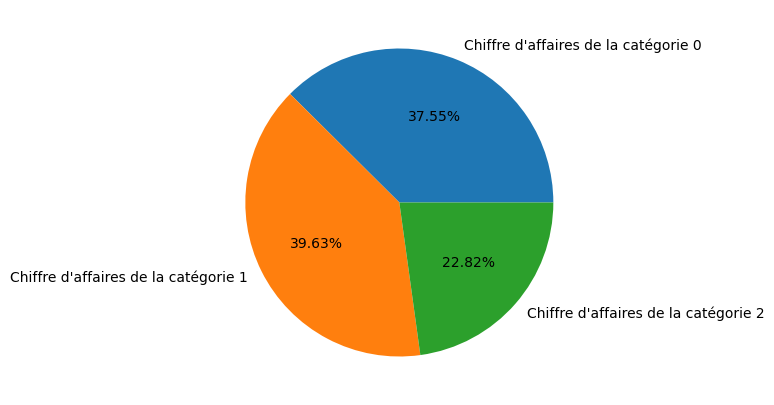

In [65]:
plt.figure(figsize = (5, 5))
x = [4121547.63, 4349504.54,2504559.13]
plt.pie(x, labels = ["Chiffre d'affaires de la catégorie 0", "Chiffre d'affaires de la catégorie 1","Chiffre d'affaires de la catégorie 2"], normalize = True,autopct='%1.2f%%')
plt.show()

In [66]:
volume_ventes_categorie = bdd.groupby("category")["session_id"].count()
volume_ventes_categorie

category
0.0    415680
1.0    227169
2.0     36483
Name: session_id, dtype: int64

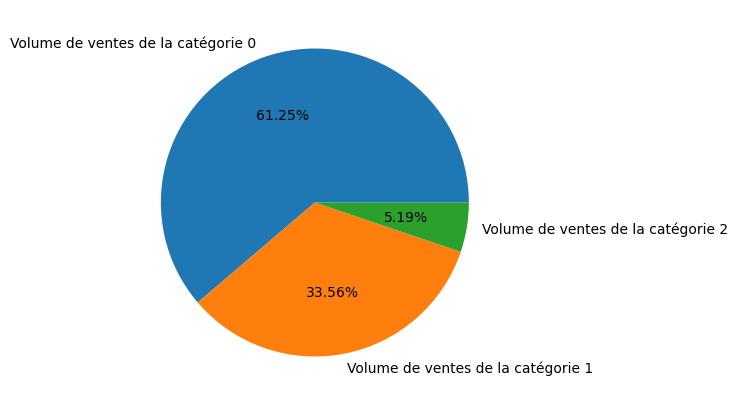

In [67]:
plt.figure(figsize = (5, 5))
x = [387493, 212348,32848]
plt.pie(x, labels = ["Volume de ventes de la catégorie 0", "Volume de ventes de la catégorie 1","Volume de ventes de la catégorie 2"], normalize = True,autopct='%1.2f%%')
plt.show()

In [68]:
analyse_categories = bdd[["category","price","annee","mois"]]
analyse_categories = pd.pivot_table(analyse_categories, 
                            index=["annee","mois"], 
                            columns=["category"], 
                            aggfunc=["sum", "count"]).reset_index()
analyse_categories.columns = ["annee", 
                      "mois", 
                      "chiffre_affaires_categorie_0", 
                      "chiffre_affaires_categorie_1", 
                      "chiffre_affaires_categorie_2", 
                      "nombre_ventes_categorie_0", 
                      "nombre_ventes_categorie_1", 
                      "nombre_ventes_categorie_2"]
analyse_categories

,annee,mois,chiffre_affaires_categorie_0,chiffre_affaires_categorie_1,chiffre_affaires_categorie_2,nombre_ventes_categorie_0,nombre_ventes_categorie_1,nombre_ventes_categorie_2
0,2021.0,3.0,193719.08,186974.17,101837.27,18140,9134,1336
1,2021.0,4.0,205362.32,156138.35,114748.49,19356,7579,1522
2,2021.0,5.0,196266.64,165893.40,130863.35,18509,8107,1677
3,2021.0,6.0,168013.08,189162.04,126983.37,15905,9264,1688
4,2021.0,7.0,144790.75,188523.27,149561.34,13582,9169,1991
5,2021.0,8.0,167827.53,162991.38,151555.79,15737,7954,1968
6,2021.0,9.0,246473.79,190613.78,70272.99,23154,9268,904
7,2021.0,10.0,199320.76,33762.32,87785.59,18769,1666,1171
8,2021.0,11.0,156009.46,252910.39,107347.78,14610,12316,1395
9,2021.0,12.0,206106.17,251026.75,68854.29,19309,12259,896


Text(0.5, 1.0, "évolution mensuelle du chiffre d'affaires par catégories")

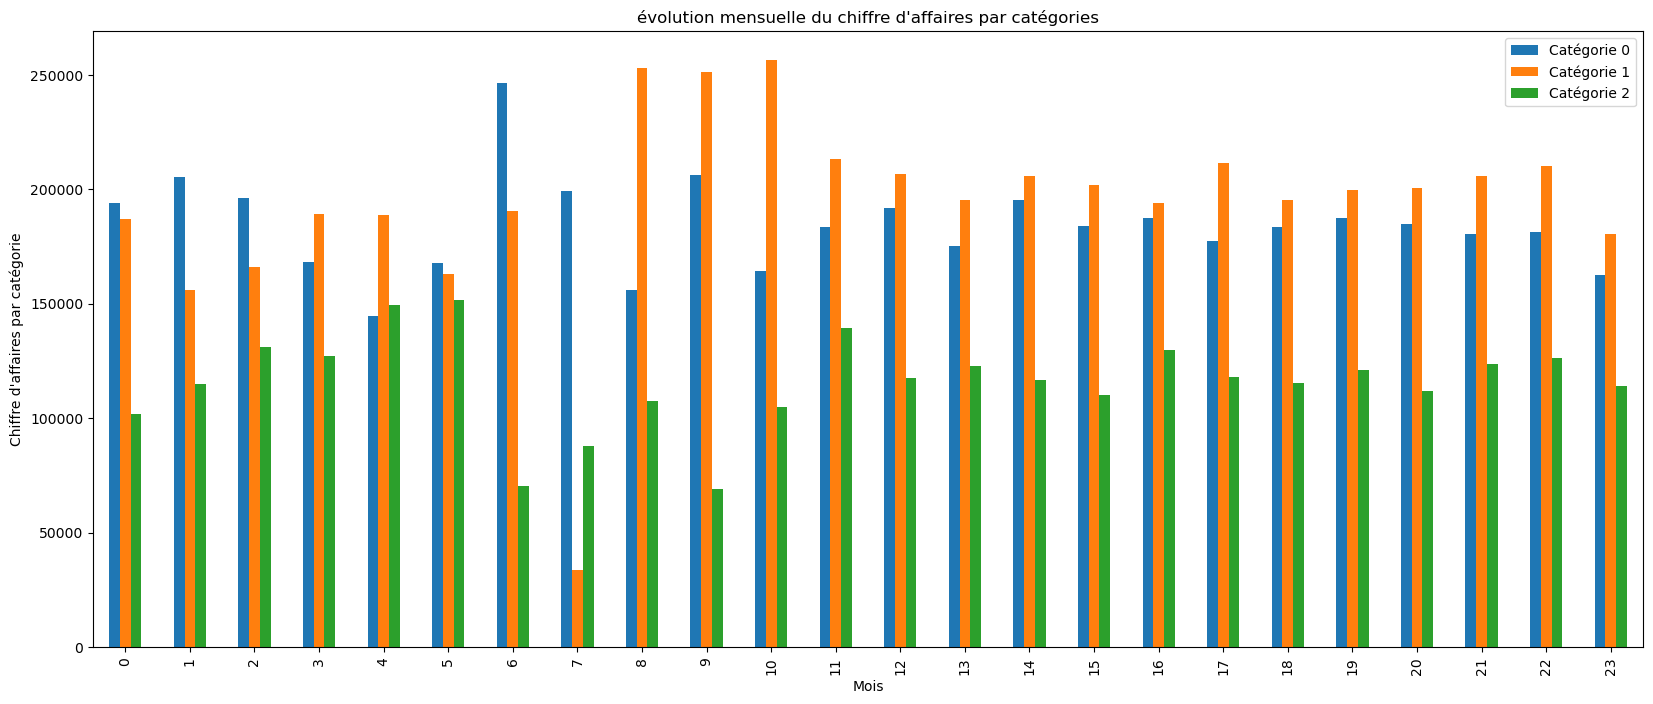

In [69]:
analyse_categories[["chiffre_affaires_categorie_0", "chiffre_affaires_categorie_1", "chiffre_affaires_categorie_2"]].plot.bar(figsize=(20,8))
plt.legend(["Catégorie 0", "Catégorie 1", "Catégorie 2"])
plt.xlabel("Mois")
plt.ylabel("Chiffre d'affaires par catégorie")
plt.title("évolution mensuelle du chiffre d'affaires par catégories")

Text(0.5, 1.0, 'Evolution mensuelle du nombre de ventes en fonction des catégories')

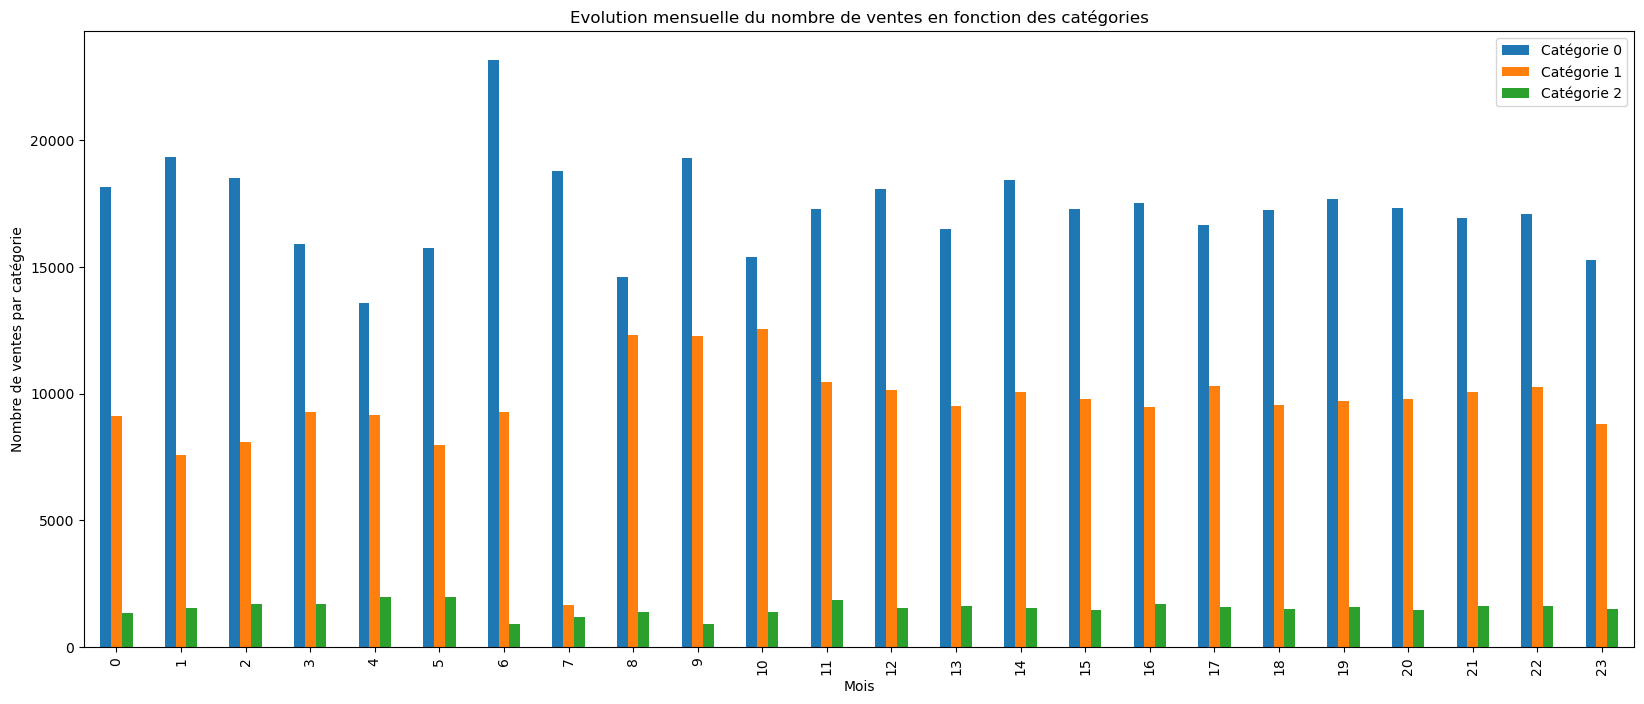

In [70]:
analyse_categories[["nombre_ventes_categorie_0", "nombre_ventes_categorie_1", "nombre_ventes_categorie_2"]].plot.bar(figsize=(20,8))
plt.legend(["Catégorie 0", "Catégorie 1", "Catégorie 2"])
plt.xlabel("Mois")
plt.ylabel("Nombre de ventes par catégorie")
plt.title("Evolution mensuelle du nombre de ventes en fonction des catégories")

Nous observons que bien que la catégorie 0 contribue significativement au nombre de ventes de la boutique, les catégories 1 et 2 génèrent cependant un chiffre d'affaires proportionnellement plus élevé.

## Septième étape : étude de la courbe de lorenz et de l'indice de gini pour le chiffre d'affaires par client

Pour rendre compte de l'importance individuelle des clients sur le chiffre d'affaires de la boutique, on se propose pour commencer de construire une courbe de Lorenz à partir des dépenses individuelles de chaque client, afin de mieux visualiser la répartition des ventes de la boutique.

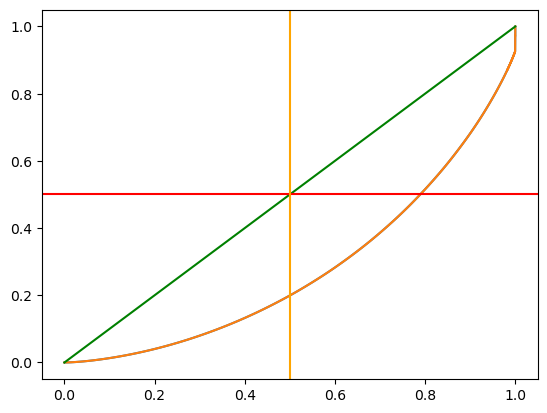

In [71]:
chiffre_affaire_client = bdd.groupby("client_id")["price"].sum()
n = len(chiffre_affaire_client)
lorenz = np.cumsum(np.sort(chiffre_affaire_client)) / chiffre_affaire_client.sum()
lorenz = np.append([0],lorenz)
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz,drawstyle='steps-post')
xaxis = np.linspace(0-1/n,1+1/n,len(lorenz))
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1], color='green')
plt.axhline(0.5, color='red')
plt.axvline(0.5, color='orange')
plt.show()

In [72]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
S = 0.5 - AUC
gini = 2*S
round(gini,3)

0.446

La courbe de Lorenz et l'indice de Gini nous indiquent une dispersion significative de l'impact des clients sur le chiffre d'affaires, avec en particulier plusieurs clients ayant un impact majeur qu'il nous faudra prendre en charge de manière personnalisée.

## Huitième étape : étude des profils clients

Pour mieux comprendre le comportement des clients, on se propose de construire un tableau dédié pour évaluer de manière détaillée le chiffre d'affaires individuel.

C:\Users\jeffs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

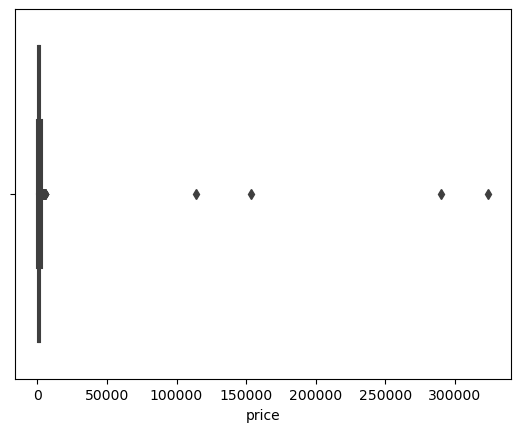

In [73]:
chiffre_affaire_client = bdd.groupby("client_id")["price"].sum()
chiffre_affaire_client
sns.boxplot(chiffre_affaire_client)

In [74]:
top_clients = bdd.groupby(["client_id"])["price"].sum()
top_clients.nlargest(20)

client_id
c_1609    324033.35
c_4958    289760.34
c_6714    153658.86
c_3454    113667.90
c_3263      5276.87
c_1570      5271.62
c_2899      5214.05
c_2140      5208.82
c_7319      5155.77
c_8026      5092.57
c_7959      5085.45
c_7421      5050.20
c_5263      5006.85
c_1422      4993.55
c_1876      4990.60
c_2595      4959.66
c_2505      4930.55
c_4491      4927.64
c_8392      4923.02
c_880       4897.19
Name: price, dtype: float64

In [75]:
analyse_client = bdd[["client_id","category","price","annee","mois"]]
analyse_client = pd.pivot_table(analyse_client, 
                            index=["client_id","annee","mois"], 
                            columns=["category"], 
                            aggfunc=["sum", "count"]).reset_index()
analyse_client.columns = ["client_id",
                          "annee", 
                      "mois", 
                      "chiffre_affaires_categorie_0", 
                      "chiffre_affaires_categorie_1", 
                      "chiffre_affaires_categorie_2", 
                      "nombre_ventes_categorie_0", 
                      "nombre_ventes_categorie_1", 
                      "nombre_ventes_categorie_2"]
analyse_client

,client_id,annee,mois,chiffre_affaires_categorie_0,chiffre_affaires_categorie_1,chiffre_affaires_categorie_2,nombre_ventes_categorie_0,nombre_ventes_categorie_1,nombre_ventes_categorie_2
0,c_1,2021.0,6.0,19.53,NaN,NaN,1.0,NaN,NaN
1,c_1,2021.0,7.0,55.22,NaN,NaN,4.0,NaN,NaN
2,c_1,2021.0,8.0,13.96,NaN,NaN,1.0,NaN,NaN
3,c_1,2021.0,9.0,19.98,NaN,NaN,2.0,NaN,NaN
4,c_1,2021.0,10.0,7.99,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
137129,c_999,2022.0,10.0,8.57,NaN,NaN,1.0,NaN,NaN
137130,c_999,2022.0,11.0,NaN,35.49,NaN,NaN,2.0,NaN
137131,c_999,2022.0,12.0,NaN,15.99,NaN,NaN,1.0,NaN
137132,c_999,2023.0,1.0,15.21,45.98,NaN,3.0,2.0,NaN


In [76]:
analyse_client.describe()

,annee,mois,chiffre_affaires_categorie_0,chiffre_affaires_categorie_1,chiffre_affaires_categorie_2,nombre_ventes_categorie_0,nombre_ventes_categorie_1,nombre_ventes_categorie_2
count,137134.000000,137134.000000,100945.000000,98875.000000,21509.000000,100945.000000,98875.000000,21509.000000
mean,2021.671270,6.493962,43.805426,47.066728,129.261008,4.117886,2.297537,1.696174
std,0.622225,3.460515,149.207084,110.384570,363.158590,13.990404,5.358205,4.748773
min,2021.000000,1.000000,0.620000,2.000000,30.990000,1.000000,1.000000,1.000000
25%,2021.000000,3.000000,14.760000,20.990000,57.990000,1.000000,1.000000,1.000000
50%,2022.000000,6.000000,28.270000,33.480000,83.990000,3.000000,2.000000,1.000000
75%,2022.000000,9.000000,54.260000,57.720000,147.580000,5.000000,3.000000,2.000000
max,2023.000000,12.000000,12549.990000,6343.240000,15415.120000,1196.000000,310.000000,209.000000


In [77]:
analyse_client.loc[analyse_client["client_id"] == 'c_580']

,client_id,annee,mois,chiffre_affaires_categorie_0,chiffre_affaires_categorie_1,chiffre_affaires_categorie_2,nombre_ventes_categorie_0,nombre_ventes_categorie_1,nombre_ventes_categorie_2
84557,c_580,2021.0,3.0,146.92,93.57,NaN,14.0,6.0,NaN
84558,c_580,2021.0,4.0,119.97,106.76,NaN,11.0,5.0,NaN
84559,c_580,2021.0,5.0,119.24,65.98,NaN,13.0,3.0,NaN
84560,c_580,2021.0,6.0,54.19,12.61,NaN,7.0,1.0,NaN
84561,c_580,2021.0,7.0,125.05,82.72,NaN,12.0,3.0,NaN
84562,c_580,2021.0,8.0,140.93,29.99,NaN,11.0,1.0,NaN
84563,c_580,2021.0,9.0,206.25,99.73,NaN,17.0,4.0,NaN
84564,c_580,2021.0,10.0,49.80,NaN,NaN,5.0,NaN,NaN
84565,c_580,2021.0,11.0,69.05,38.98,NaN,6.0,2.0,NaN
84566,c_580,2021.0,12.0,49.41,23.37,NaN,4.0,1.0,NaN


In [78]:
analyse_client.loc[
    (analyse_client["client_id"] == 'c_1609') | 
    (analyse_client["client_id"] == 'c_4958') | 
    (analyse_client["client_id"] == 'c_6714') |
    (analyse_client["client_id"] == 'c_3454')]

,client_id,annee,mois,chiffre_affaires_categorie_0,chiffre_affaires_categorie_1,chiffre_affaires_categorie_2,nombre_ventes_categorie_0,nombre_ventes_categorie_1,nombre_ventes_categorie_2
10790,c_1609,2021.0,3.0,9475.80,4264.87,NaN,879.0,204.0,NaN
10791,c_1609,2021.0,4.0,9496.55,4046.79,NaN,900.0,191.0,NaN
10792,c_1609,2021.0,5.0,9890.86,3692.95,NaN,947.0,185.0,NaN
10793,c_1609,2021.0,6.0,7676.16,4424.61,291.98,726.0,222.0,2.0
10794,c_1609,2021.0,7.0,6605.77,3944.42,41.31,623.0,205.0,1.0
...,...,...,...,...,...,...,...,...,...
100990,c_6714,2022.0,10.0,2428.40,3066.85,1017.46,229.0,148.0,15.0
100991,c_6714,2022.0,11.0,2199.90,3021.48,1429.18,207.0,149.0,16.0
100992,c_6714,2022.0,12.0,2727.02,4002.22,680.44,252.0,195.0,11.0
100993,c_6714,2023.0,1.0,2422.19,3363.17,1652.18,215.0,166.0,19.0


Nos données permettent ainsi de mettre en valeur 4 clients ayant un impact significativement plus élevé que les autres sur le chiffre d'affaires, qui sont sûrement des acheteurs / revendeurs, et autour desquels il convient de mettre en place un accompagnement personnalisé, afin d'éviter notamment des problèmes de stock à des moments critiques.

In [79]:
bdd.drop(bdd[bdd["client_id"].isin(['c_1609','c_4958','c_6714','c_3454'])].index,axis=0,inplace=True)
# Pour la suite de notre analyse, on décide de retirer les quatre clients spéciaux de la base de données, afin de ne pas fausser certains résultats de part leur impact sur le poids des ventes.

## Neuvième étape : analyse des clients en fonction du genre

Maintenant que nous avons pu analyser les tendances globales, nous avons à présent évaluer l'impact de certains paramètres tels que le genre et la catégorie d'âge sur les achats de nos clients. Pour ce faire, on se propose de réaliser une heatmap de l'impact du genre des clients sur leurs achats, en prenant en compte chaque catégorie.

In [80]:
repartition_genre_clients = customers.groupby(["sex"])["client_id"].count()
repartition_genre_clients

sex
f    4490
m    4131
Name: client_id, dtype: int64

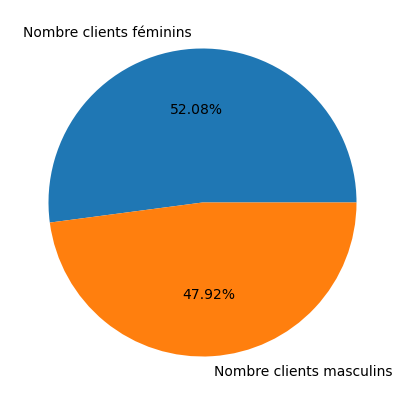

In [81]:
plt.figure(figsize = (5, 5))
x = [4490,4131]
plt.pie(x, labels = ['Nombre clients féminins','Nombre clients masculins'], normalize = True,autopct='%1.2f%%')
plt.show()

Les statistiques de l'INSEE nous indiquent actuellement un ratio de 51,61% de femmes pour 48,39% d'hommes en France, les statistiques de clientèle de la boutique restent donc proches de la population française.

In [82]:
chiffre_affaires_par_genre = bdd.groupby(["sex"])["price"].sum()
chiffre_affaires_par_genre

sex
f    5707193.10
m    5267622.92
Name: price, dtype: float64

In [83]:
nombre_ventes_par_genre = bdd.groupby(["sex"])["price"].count()
nombre_ventes_par_genre

sex
f    329215
m    303474
Name: price, dtype: int64

In [84]:
moyenne_ventes_genre = bdd.groupby(["sex"])["price"].mean()
moyenne_ventes_genre

sex
f    17.335763
m    17.357740
Name: price, dtype: float64

Pour évaluer l'impact du genre sur les ventes, on se propose de réaliser un test du chi-2 en prenant l'hypothèse suivante :
- H0 : le sexe du client et la catégorie de livres sont deux variables indépendantes
- H1 : les deux variables ne sont pas indépendantes

In [85]:
table_croisement_donnees_genre = pd.crosstab(bdd["sex"],bdd["category"])
print(table_croisement_donnees_genre)

category     0.0     1.0    2.0
sex                            
f         200904  111331  16980
m         186589  101017  15868


In [86]:
cs_chi2, cs_p, cs_dof, cs_exp = st.chi2_contingency(table_croisement_donnees_genre)

In [87]:
print(cs_exp)

[[201629.09106212 110493.69725094  17092.21168694]
 [185863.90893788 101854.30274906  15755.78831306]]


In [88]:
print(cs_chi2)
print(cs_dof)
print(cs_p)

20.200173796862927
2
4.1075985631484716e-05


[]

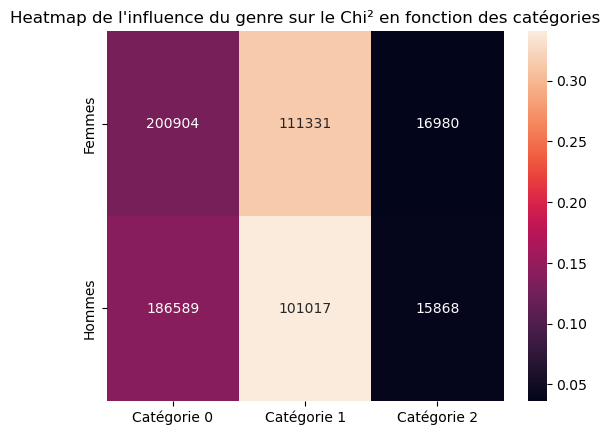

In [89]:
len_i = table_croisement_donnees_genre.shape[0]
len_j = table_croisement_donnees_genre.shape[1]
xij = np.zeros((len_i, len_j))
for i in range(len_i):
    for j in range(len_j):
        xij[i,j] = (table_croisement_donnees_genre.values[i,j]-cs_exp[i,j])**2 / cs_exp[i,j]

sns.heatmap(xij/cs_chi2,
            annot=table_croisement_donnees_genre,
            fmt='d',
            yticklabels=["Femmes","Hommes"],
            xticklabels=["Catégorie 0", "Catégorie 1", "Catégorie 2"])
plt.title("Heatmap de l'influence du genre sur le Chi² en fonction des catégories")
plt.plot()

Après analyse, avec une p-value inférieure à 0,001, on peut valider l'hypothèse H0 et admettre qu'il n'y a pas de corrélation entre le genre des clients et les catégories d'achats.

# Analyse de l'influence de l'âge sur le comportement des clients

Pour démarrer notre analyse, on se propose tout d'abord de se doter d'un histogramme afin de visualiser la pyramide des âges au sein de la clientèle, puis de séparer les clients en catégories distinctes pour isoler certaines tendances (les bornes restent malheureusement arbitraires).
On constate par ailleurs un pic pour les clients de 18 ans, il faudra mettre en place des questionnaires pour identifier la présence de clients mineurs au sein de la boutique.

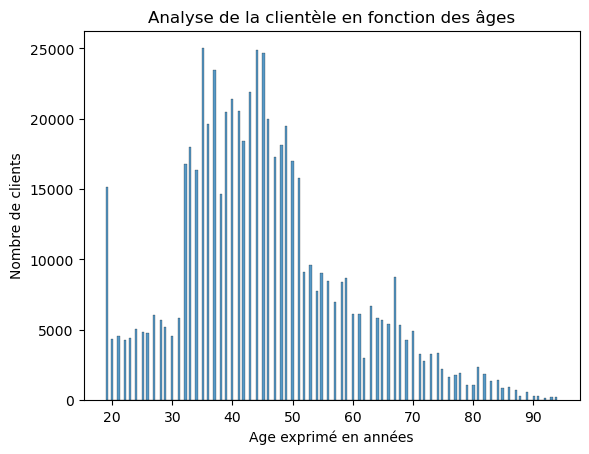

In [90]:
sns.histplot(data=bdd["age"],)
plt.title("Analyse de la clientèle en fonction des âges")
plt.ylabel("Nombre de clients")
plt.xlabel("Age exprimé en années")
plt.show()

In [91]:
bdd["categorie_age"] = pd.cut(x= bdd["age"], 
                              bins=[0,30,50,70,100],
                              ordered=True,
                              labels=["0-30","31-50","51-70","71-100"]
                             )
bdd

,id_prod,date,session_id,client_id,sex,birth,age,price,category,annee,mois,categorie_age
191139,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967.0,56.0,11.99,0.0,2021.0,3.0,51-70
2269,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,m,1960.0,63.0,19.37,0.0,2021.0,3.0,51-70
441509,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,m,1988.0,35.0,4.50,0.0,2021.0,3.0,31-50
446670,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989.0,34.0,6.55,0.0,2021.0,3.0,31-50
67108,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956.0,67.0,16.49,0.0,2021.0,3.0,51-70
...,...,...,...,...,...,...,...,...,...,...,...,...
679348,0_1624,NaT,NaN,NaN,NaN,NaN,NaN,24.50,0.0,NaN,NaN,NaN
679349,2_86,NaT,NaN,NaN,NaN,NaN,NaN,132.36,2.0,NaN,NaN,NaN
679350,0_299,NaT,NaN,NaN,NaN,NaN,NaN,22.99,0.0,NaN,NaN,NaN
679351,0_510,NaT,NaN,NaN,NaN,NaN,NaN,23.66,0.0,NaN,NaN,NaN


In [92]:
age_clients = bdd[['client_id','age','categorie_age']].drop_duplicates()

In [93]:
chiffre_affaires_categorie_age = bdd.groupby(["categorie_age"])["price"].sum()
chiffre_affaires_categorie_age

categorie_age
0-30      2775097.78
31-50     5234182.20
51-70     2394429.56
71-100     571106.48
Name: price, dtype: float64

In [94]:
volume_ventes_categorie_age = bdd.groupby(["categorie_age"])["price"].count()
volume_ventes_categorie_age

categorie_age
0-30       68846
31-50     383721
51-70     145913
71-100     34209
Name: price, dtype: int64

In [95]:
table_chiffre_affaires_age = bdd[['client_id','age','price']]
table_chiffre_affaires_age

,client_id,age,price
191139,c_329,56.0,11.99
2269,c_664,63.0,19.37
441509,c_580,35.0,4.50
446670,c_7912,34.0,6.55
67108,c_2033,67.0,16.49
...,...,...,...
679348,NaN,NaN,24.50
679349,NaN,NaN,132.36
679350,NaN,NaN,22.99
679351,NaN,NaN,23.66


In [96]:
age_client = age_clients[["client_id","age"]]
age_client

,client_id,age
191139,c_329,56.0
2269,c_664,63.0
441509,c_580,35.0
446670,c_7912,34.0
67108,c_2033,67.0
...,...,...
173335,c_224,27.0
29804,c_2566,52.0
593332,c_2269,25.0
483225,c_177,50.0


In [97]:
chiffre_affaires_client = table_chiffre_affaires_age[['client_id','price']]
chiffre_affaires_client = chiffre_affaires_client.groupby(['client_id']).agg({'price': 'sum'}).reset_index()
chiffre_affaires_client.columns = ['client_id','chiffre_affaires_client']
chiffre_affaires_client

,client_id,chiffre_affaires_client
0,c_1,558.18
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2261.89
4,c_1001,1812.86
...,...,...
8591,c_995,189.41
8592,c_996,1625.58
8593,c_997,1490.01
8594,c_998,2779.88


In [98]:
analyse_ca_client = pd.merge(age_client, chiffre_affaires_client, on='client_id')
chiffre_affaires_moyen_par_age = analyse_ca_client.groupby("age").mean()
chiffre_affaires_moyen_par_age

,chiffre_affaires_client
age,
19.0,1393.624005
20.0,1228.936414
21.0,1270.395310
22.0,1427.981600
23.0,1213.440882
...,...
90.0,658.042500
91.0,840.531667
92.0,703.862500


Text(0.5, 1.0, "Chiffre d'affaires moyen en fonction de l'âge des clients")

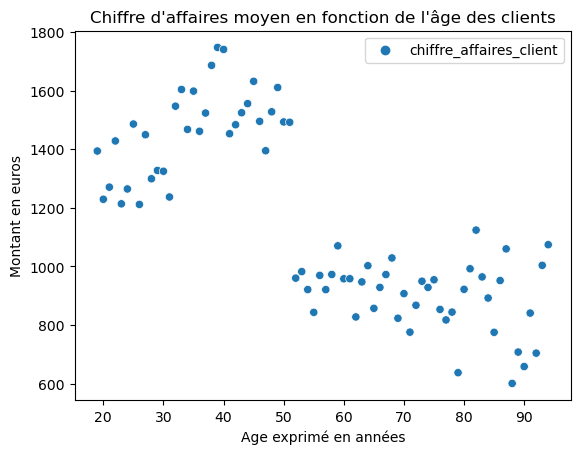

In [99]:
sns.scatterplot(data= chiffre_affaires_moyen_par_age)
plt.ylabel("Montant en euros")
plt.xlabel("Age exprimé en années")
plt.title("Chiffre d'affaires moyen en fonction de l'âge des clients")

In [100]:
st.spearmanr(chiffre_affaires_moyen_par_age.index,chiffre_affaires_moyen_par_age)

SpearmanrResult(correlation=-0.7246206425153793, pvalue=1.3672335151214274e-13)

Une première observation des données semble nous indiquer une relation décroissante entre l'âge des clients et le montant moyen des achats effectués avec ces derniers. Pour approfondir l'analyse, on se propose d'appliquer un test de corrélation de Spearman avec les hypothèses suivantes : 

- H0 : il y a une  corrélation entre le chiffre d'affaires moyen et l'âge des clients (hypothèse nulle)
- H1 : il n'y a pas de corrélation entre le chiffe d'affaires moyen et l'âge des clients (hypothèse alternative)

Avec un coefficient de -0,724 et une p-value inférieure à 0,001, nous pouvons affirmer qu'il y a une corrélation inversée entre le montant total de dépenses et l'âge des clients, en d'autres termes plus les clients vieillisent, moins ils dépensent, bien qu'il y ait un montant plancher.

Text(0.5, 1.0, "Nombre de ventes en fonction de l'âge des clients")

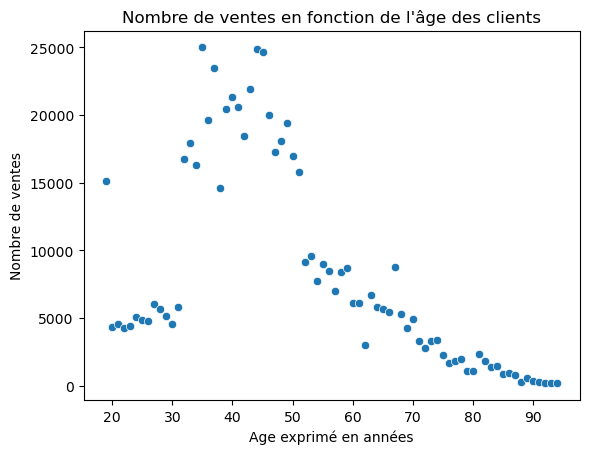

In [101]:
volume_ventes_age = bdd.groupby(["age"])["price"].count()
sns.scatterplot(data= volume_ventes_age)
plt.ylabel("Nombre de ventes")
plt.xlabel("Age exprimé en années")
plt.title("Nombre de ventes en fonction de l'âge des clients")

In [102]:
st.spearmanr(volume_ventes_age.index,volume_ventes_age)

SpearmanrResult(correlation=-0.6738482570061518, pvalue=2.5391854434818517e-11)

## Une décomposition du chiffre d'affaires client par année

Pour affiner davantage notre analyse, on segmente le chiffre d'affaires des clients en fonction des années pour mieux comprendre leur comportement.

In [103]:
table_panier_clients = bdd[['client_id','age','categorie_age','price','annee']]
table_panier_clients

,client_id,age,categorie_age,price,annee
191139,c_329,56.0,51-70,11.99,2021.0
2269,c_664,63.0,51-70,19.37,2021.0
441509,c_580,35.0,31-50,4.50,2021.0
446670,c_7912,34.0,31-50,6.55,2021.0
67108,c_2033,67.0,51-70,16.49,2021.0
...,...,...,...,...,...
679348,NaN,NaN,NaN,24.50,NaN
679349,NaN,NaN,NaN,132.36,NaN
679350,NaN,NaN,NaN,22.99,NaN
679351,NaN,NaN,NaN,23.66,NaN


In [104]:
paniers_annuels_clients = table_panier_clients[['client_id','price','annee']]
paniers_annuels_clients = paniers_annuels_clients.groupby(['client_id','annee']).agg({'price': 'sum'}).reset_index()
paniers_annuels_clients.columns = ['client_id','annee','panier_achat']

In [105]:
paniers_annuels_clients = paniers_annuels_clients.groupby(['client_id']).agg({'panier_achat': 'mean'}).reset_index()
paniers_annuels_clients.columns = ['client_id','panier_annuel_moyen']

In [106]:
analyse_panier = pd.merge(age_clients, paniers_annuels_clients, on='client_id')
analyse_panier

,client_id,age,categorie_age,panier_annuel_moyen
0,c_329,56.0,51-70,377.646667
1,c_664,63.0,51-70,763.583333
2,c_580,35.0,31-50,1440.223333
3,c_7912,34.0,31-50,1007.420000
4,c_2033,67.0,51-70,419.023333
...,...,...,...,...
8591,c_3058,64.0,51-70,54.095000
8592,c_224,27.0,0-30,247.920000
8593,c_2566,52.0,51-70,81.390000
8594,c_2269,25.0,0-30,97.100000


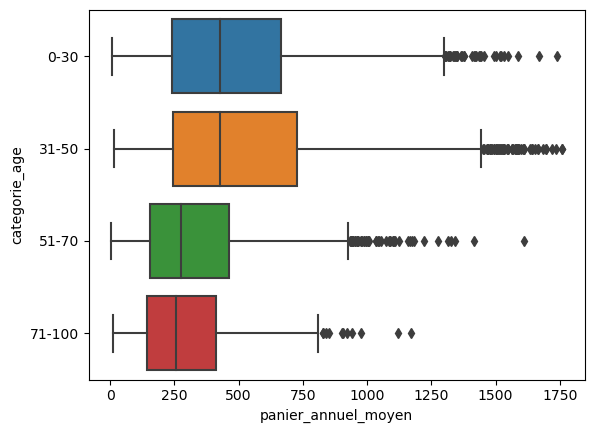

In [107]:
representation_graphique_paniers_annuels = sns.boxplot(x=analyse_panier["panier_annuel_moyen"],
                                                 y=analyse_panier["categorie_age"])

In [108]:
st.normaltest(analyse_panier["panier_annuel_moyen"], axis=0, nan_policy='propagate')

NormaltestResult(statistic=1424.1379489682647, pvalue=5.65423229795043e-310)

In [109]:
kstat, pval = st.kruskal(*[group["panier_annuel_moyen"].values for name, group in analyse_panier.groupby("categorie_age")])
pval

2.6794252887104213e-139

Nos analyses nous montrent ainsi que si le panuel annuel moyen d'achats des clients diminue en fonction de la catégorie d'âge, les écarts interquartiles diminuent également, ce qui indique un certain niveau de stabilité se mettant progressivement en place. 

En posant les hypothèses
- HO : la distribution suit une loi normale (hypothèse nulle)
- H1 : il est possible que la distribution ne suive pas une loi normale (hypothèse alternative)

puis en effectuant un test de normalité sous ces paramètres, nous arrivons à une p-value significativement inférieure à 0,001, ce qui nous permet de rejeter l'hypothèse H0 et admettre que les données ne suivent pas une loi normale.

L'absence de distribution normale nous permet ensuite d'effectuer un test de Kruskal-Wallis avec les hypothèses suivantes :
- H0 : le panier annuel moyen d'un client n'est pas corréléré à sa catégorie d'âge
- H1 : le panier annuel moyen d'un client est corréléré à sa catégorie d'âge

Avec une p-value inférieure à 0,001, nous pouvons rejeter l'hypothèse H0 et conclure que le panier annuel moyen des clients de la boutique est corréléré à leur catégorie d'âge. Nous pouvons également constater que les deux premières catégories ont un potentiel de consommation plus élevé et pourront bénéficier d'offres plus personnalisées.

## Une analyse du nombre de livres présents par panier d'achats

Pour la suite de l'analyse, on se propose d'analyser la relation entre les catégories d'âge et la taille du panier moyen des clients, c'est-à-dire le nombre de livres achetés par session d'achat. Pour cela, on se propose de construire un tableau adapté à nos besoins à partir de nos données, avant d'y appliquer des tests statistiques.

In [110]:
table_sessions = bdd[['client_id', 'age','categorie_age','mois','annee','id_prod','session_id']]

In [111]:
paniers_clients = table_sessions[['client_id','annee','mois','id_prod','session_id']]
paniers_clients = paniers_clients.groupby(['client_id','annee','mois','session_id']).agg({'id_prod':'count'}).reset_index()

In [112]:
paniers_clients.columns = ['client_id','annee','mois','session_id','paniers_achats']
paniers_clients = paniers_clients.groupby('client_id').agg({'paniers_achats': 'mean'}).reset_index()

In [113]:
paniers_clients.columns = ['client_id','nombre_livres_par_session']

In [114]:
analyse_paniers = pd.merge(age_clients, paniers_clients, on='client_id')
analyse_paniers

,client_id,age,categorie_age,nombre_livres_par_session
0,c_329,56.0,51-70,1.800000
1,c_664,63.0,51-70,1.115385
2,c_580,35.0,31-50,2.537313
3,c_7912,34.0,31-50,2.390000
4,c_2033,67.0,51-70,1.173913
...,...,...,...,...
8591,c_3058,64.0,51-70,1.000000
8592,c_224,27.0,0-30,2.000000
8593,c_2566,52.0,51-70,3.000000
8594,c_2269,25.0,0-30,3.000000


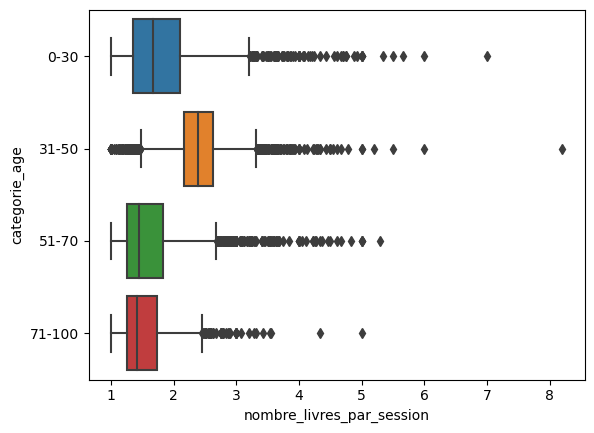

In [115]:
representation_graphique_paniers = sns.boxplot(x=analyse_paniers["nombre_livres_par_session"],
                                               y=analyse_paniers["categorie_age"])

In [116]:
st.normaltest(analyse_paniers["nombre_livres_par_session"], axis=0, nan_policy='propagate')

NormaltestResult(statistic=1427.791660055333, pvalue=9.0987213574647e-311)

In [117]:
kstat, pval = st.kruskal(*[analyse_paniers["nombre_livres_par_session"].values for name, group in analyse_paniers.groupby("categorie_age")])
pval

1.0

Après avoir mis en place notre table de données, on décide d'appliquer un test de normalité de la distribution avec les hypothèses suivantes :

- H0 : la distribution suit une distribution normale (hypothèse nulle)
- H1 : on ne peut pas exclure la possibilité que la distribution ne suive pas une loi normale (hypothèse alternative)

Avec une p-value inférieure à 0,001, on peut rejeter l'hypothèse H0 et admettre que la distribution des données ne suive pas une distribution normale. Cela nous permet d'appliquer aux données un test de Kruskal-Wallis avec les hypothèses suivantes :

- H0 : il y a une corrélation entre la taille du panier d'achat et la catégorie d'âge (hypothèse nulle)
- H1 : il n'y a pas de corrélation entre la taille du panier d'achat et la catégorie d'âge (hypothèse alternative)

Avec une p-value égale à 1, nous pouvons rejeter l'hypothèse H0 et conclure qu'au moins un des groupes (la catégorie des 31-50 ans) a un comportement de consommation différent des autres et peut donc bénéficier d'un suivi adapté.

## Une étude de la relation entre les catégories de livres et les catégories d'âge

Pour finir notre étude, on se propose d'étudier la relation entre les catégories de livres présentes au sein de la boutique et les catégories d'âge de notre clientèle. Pour cela, on se propose de construire un tableau synthétisant les données à notre disposition pour ensuite tester certains paramètres.

In [118]:
table_categories = bdd[['client_id','categorie_age','id_prod','category']]
table_categories

,client_id,categorie_age,id_prod,category
191139,c_329,51-70,0_1259,0.0
2269,c_664,51-70,0_1390,0.0
441509,c_580,31-50,0_1352,0.0
446670,c_7912,31-50,0_1458,0.0
67108,c_2033,51-70,0_1358,0.0
...,...,...,...,...
679348,NaN,NaN,0_1624,0.0
679349,NaN,NaN,2_86,2.0
679350,NaN,NaN,0_299,0.0
679351,NaN,NaN,0_510,0.0


In [119]:
achats_categories = table_categories[['client_id','category','id_prod']]
achats_categories = achats_categories.groupby(['client_id','category']).agg({'id_prod':'count'}).reset_index()
achats_categories

,client_id,category,id_prod
0,c_1,0.0,30
1,c_1,1.0,8
2,c_1,2.0,1
3,c_10,0.0,20
4,c_10,1.0,34
...,...,...,...
19929,c_998,0.0,14
19930,c_998,1.0,11
19931,c_998,2.0,28
19932,c_999,0.0,19


In [120]:
analyse_categories_age_livre = pd.merge(age_clients, achats_categories, on='client_id')
analyse_categories_age_livre

,client_id,age,categorie_age,category,id_prod
0,c_329,56.0,51-70,0.0,24
1,c_329,56.0,51-70,1.0,39
2,c_664,63.0,51-70,0.0,47
3,c_664,63.0,51-70,1.0,69
4,c_580,35.0,31-50,0.0,261
...,...,...,...,...,...
19929,c_2566,52.0,51-70,0.0,9
19930,c_2269,25.0,0-30,0.0,4
19931,c_2269,25.0,0-30,1.0,2
19932,c_177,50.0,31-50,0.0,9


In [121]:
analyse_categories_age_livre.columns = ['client_id','age','categorie_age','category','nombre_achats_moyen_categorie']
analyse_categories_age_livre = analyse_categories_age_livre.groupby(['category','categorie_age']).agg({'nombre_achats_moyen_categorie': 'mean'}).reset_index()
analyse_categories_age_livre

,category,categorie_age,nombre_achats_moyen_categorie
0,0.0,0-30,10.468835
1,0.0,31-50,86.304842
2,0.0,51-70,28.193495
3,0.0,71-100,23.062402
4,1.0,0-30,12.918581
5,1.0,31-50,27.058160
6,1.0,51-70,31.334430
7,1.0,71-100,29.605263
8,2.0,0-30,13.800000
9,2.0,31-50,4.291096


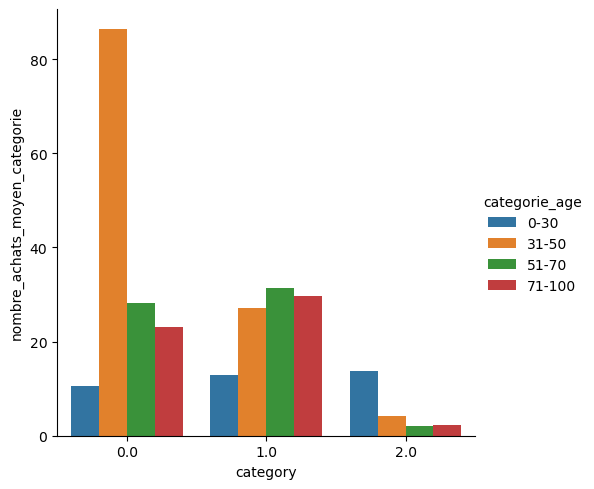

In [122]:
representation_analyse_categories = sns.catplot(data = analyse_categories_age_livre,
                                                kind="bar",
                                                x = "category",
                                                y = "nombre_achats_moyen_categorie",
                                                hue = "categorie_age")   

In [123]:
st.kstest(analyse_categories_age_livre["nombre_achats_moyen_categorie"],analyse_categories_age_livre["category"])

KstestResult(statistic=1.0, pvalue=7.396023010506791e-07)

In [124]:
kstat, pval = st.kruskal(*[analyse_categories_age_livre["nombre_achats_moyen_categorie"].values for name, group in analyse_categories_age_livre.groupby("categorie_age")])
pval

1.0

Au regard de la taille relativement faible de l'échantillon, il n'est pas possible d'appliquer un test de normalité à la distribution, on décide donc d'utiliser à la place un test de Kolmogorov-Smirmov avec les hypothèses suivantes :

- H0 : les échantillons proviennent d'une même distribution (hypothèse nulle)
- H1 : les échantillons proviennent de distributions différentes (hypothèse alternative)

Avec une p-value inférieure à 0.001, nous pouvons rejeter l'hypothèse nulle et admettre que les distributions entre les catégories d'âge peuvent être traitées séparément. Nous appliquons ensuite un test de Kruskal-Wallis aux données avec les hypothèses suivantes :
- H0 : il n'y a pas de relation entre la catégorie d'âge et le nombre d'achats moyen des clients (hypothèse nulle)
- H1 : au moins une des catégories d'âge a un comportement de consommation différent des autres (hypothèse alternative)

Avec une p-value égale à 1, nous pouvons conclure qu'au moins un des groupes d'étude, en l'occurence la catégorie des 31-50 ans, a un comportement différent des autres groupes et a notamment une appétence marquée pour les livres se trouvant dans la catégorie 0.

## Une approche de la relation entre catégories d'âge et catégories de livres par une table de contingence

Pour prolonger notre analyse sur la relation entre les catégories de livre et les catégories d'âge, on se propose également de construire une table de contingence à partir des données disponibles, dans le but de construire une heatmap pour visualiser les situations plus en détail et mieux comprendre certaines interactions.

In [125]:
table_croisement_categories = pd.crosstab(bdd["category"],bdd["categorie_age"])
print(table_croisement_categories)

categorie_age   0-30   31-50  51-70  71-100
category                                   
0.0            15452  288776  68482   14783
1.0            25863   91186  76174   19125
2.0            27531    3759   1257     301


In [126]:
cs_chi2, cs_p, cs_dof, cs_exp = st.chi2_contingency(table_croisement_categories)

In [127]:
print(cs_exp)

[[ 42165.01800727 235011.51664246  89365.02153349  20951.44381679]
 [ 23106.62965217 128787.42463991  48972.45522524  11481.49048269]
 [  3574.35234057  19922.05871763   7575.52324128   1776.06570053]]


In [128]:
print(cs_chi2)
print(cs_dof)
print(cs_p)

247599.10683473386
6
0.0


[]

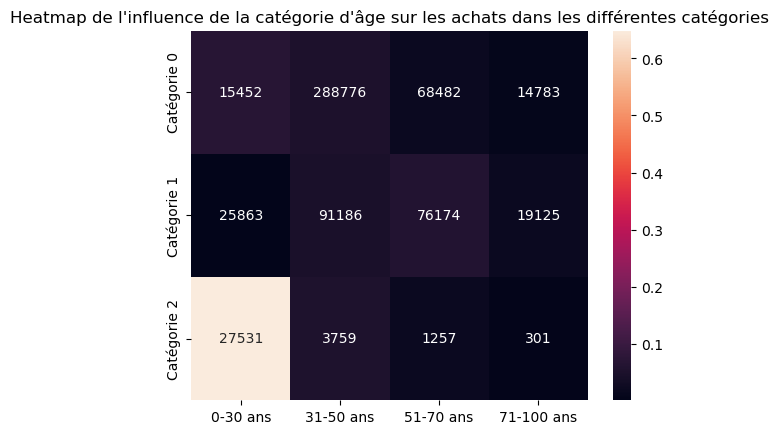

In [129]:
len_i = table_croisement_categories.shape[0]
len_j = table_croisement_categories.shape[1]
xij = np.zeros((len_i, len_j))
for i in range(len_i):
    for j in range(len_j):
        xij[i,j] = (table_croisement_categories.values[i,j]-cs_exp[i,j])**2 / cs_exp[i,j]

sns.heatmap(xij/cs_chi2,
            annot=table_croisement_categories,
            fmt='d',
            yticklabels = ["Catégorie 0","Catégorie 1","Catégorie 2"],
            xticklabels = ["0-30 ans","31-50 ans","51-70 ans","71-100 ans"])
plt.title("Heatmap de l'influence de la catégorie d'âge sur les achats dans les différentes catégories")
plt.plot()

Comme précédemment, nous commençons d'abord par appliquer un test du Chi-2 sur notre tableau de contingence avec les hypothèses suivantes :
- H0 : les échantillons suivent une même loi de distribution et toute différence est due au hasard (hypothèse nulle)
- H1 : il y a au moins un paramètre autre que le hasard influençant les échantillons (hypothèse alternative)

Avec une p-value nulle, nous pouvons rejeter clairement l'hypothèse H0 et conclure qu'il y a effectivement une corrélation entre les catégories de livre et les catégories d'âge sous certaines conditions.

## Etude de la relation entre la fréquence d'achat et la catégorie d'âge

Pour finir notre étude, on se propose d'étudier la relation entre la catégorie d'âge et la fréquence d'achats, c'est-à-dire le nombre de fois que les clients se sont connectés pour effectuer des achats sur le site, afin d'identifier les clients les plus réguliers sur le site.

In [130]:
table_frequence = bdd[['client_id','categorie_age','session_id','category','age']]
table_frequence

,client_id,categorie_age,session_id,category,age
191139,c_329,51-70,s_1,0.0,56.0
2269,c_664,51-70,s_2,0.0,63.0
441509,c_580,31-50,s_3,0.0,35.0
446670,c_7912,31-50,s_4,0.0,34.0
67108,c_2033,51-70,s_5,0.0,67.0
...,...,...,...,...,...
679348,NaN,NaN,NaN,0.0,NaN
679349,NaN,NaN,NaN,2.0,NaN
679350,NaN,NaN,NaN,0.0,NaN
679351,NaN,NaN,NaN,0.0,NaN


In [131]:
nombre_connexions = table_frequence[['client_id','age','session_id']]
nombre_connexions = nombre_connexions.groupby(['client_id']).agg({'session_id':'count'}).reset_index()
nombre_connexions

,client_id,session_id
0,c_1,39
1,c_10,58
2,c_100,8
3,c_1000,125
4,c_1001,102
...,...,...
8591,c_995,14
8592,c_996,95
8593,c_997,59
8594,c_998,53


In [132]:
analyse_frequence = pd.merge(age_clients, nombre_connexions, on='client_id')
analyse_frequence

,client_id,age,categorie_age,session_id
0,c_329,56.0,51-70,63
1,c_664,63.0,51-70,116
2,c_580,35.0,31-50,340
3,c_7912,34.0,31-50,239
4,c_2033,67.0,51-70,81
...,...,...,...,...
8591,c_3058,64.0,51-70,5
8592,c_224,27.0,0-30,8
8593,c_2566,52.0,51-70,9
8594,c_2269,25.0,0-30,6


In [133]:
analyse_frequence.columns = ['client_id','age','categorie_age','nombre_connexions_moyen']
analyse_frequence = analyse_frequence.groupby(['age']).agg({'nombre_connexions_moyen' : 'mean'}).reset_index()
analyse_frequence

,age,nombre_connexions_moyen
0,19.0,34.665904
1,20.0,30.144828
2,21.0,31.634483
3,22.0,34.016000
4,23.0,32.463235
...,...,...
71,90.0,40.875000
72,91.0,51.833333
73,92.0,42.500000
74,93.0,56.500000


Text(0.5, 1.0, "Nombre de connexions en fonction de l'âge des clients")

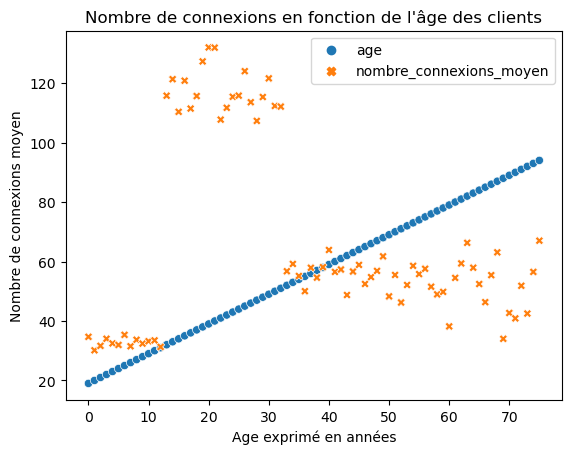

In [134]:
sns.scatterplot(data= analyse_frequence)
plt.ylabel("Nombre de connexions moyen")
plt.xlabel("Age exprimé en années")
plt.title("Nombre de connexions en fonction de l'âge des clients")

In [135]:
st.normaltest(analyse_frequence["nombre_connexions_moyen"], axis=0, nan_policy='propagate')

NormaltestResult(statistic=12.661411962719537, pvalue=0.0017807761304649797)

In [136]:
st.spearmanr(analyse_frequence['age'],analyse_frequence['nombre_connexions_moyen'])

SpearmanrResult(correlation=-0.00016404647983595352, pvalue=0.9988778380717482)

Après avoir construit notre tableau d'étude, nous commençons par appliquer un test de normalité à nos données avec les hypothèses suivantes :
- H0 : la distribution suit une loi normale (hypothèse nulle)
- H1 : on ne peut pas rejeter la possibilité que la distribution ne suive pas une loi normale (hypothèse alternative)

Avec une p-value proche de 0,001, nous pouvons rejeter l'hypothèse H0 et admettre que la distribution ne suive pas une loi normale. Dans ces circonstances, on peut appliquer aux données un test de corrélation de Spearman avec les hypothèses suivantes :
- H0 : les deux variables étudiées sont indépendantes (hypothèse nulle)
- H1 : il y a une corrélation entre les deux variables pour certains groupes étudiés (hypothèse alternative)

Avec un coefficient de corrélation proche de 0 et une p-value proche de 1, nous ne pouvons pas rejeter l'hypothèse nulle et admettre qu'il n'y a pas de corrélation entre les deux variables.